# Analise da serie temporal 01 - Cotacao do Dolar em relacao ao Real

In [19]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

# imports de modulos que estao definidos dentro do projeto
import arima
import timeseries

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df_original = pd.read_csv('../output/timeseries01.csv', header=0, names=['date', 'rate'])

#arima.print_dataframe_info(df_original)

## Obtendo a serie temporal DIARIA

In [21]:
df_daily = df_original.copy()
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily = df_daily.set_index('date')

#arima.print_dataframe_info(df_daily)

In [22]:
# esse comando preenche as datas que estao faltando
df_daily = df_daily.resample('D').ffill()

#arima.print_dataframe_info(df_daily)

In [23]:
df_daily = df_daily.replace(0, np.nan)
df_daily = df_daily.replace('.', np.nan)

print(df_daily.isnull().values.any())

True


In [24]:
df_daily = df_daily.fillna(method='ffill')

print(df_daily.isnull().values.any())

False


In [25]:
df_daily['rate'] = pd.to_numeric(df_daily['rate'])

#arima.print_dataframe_info(df_daily)

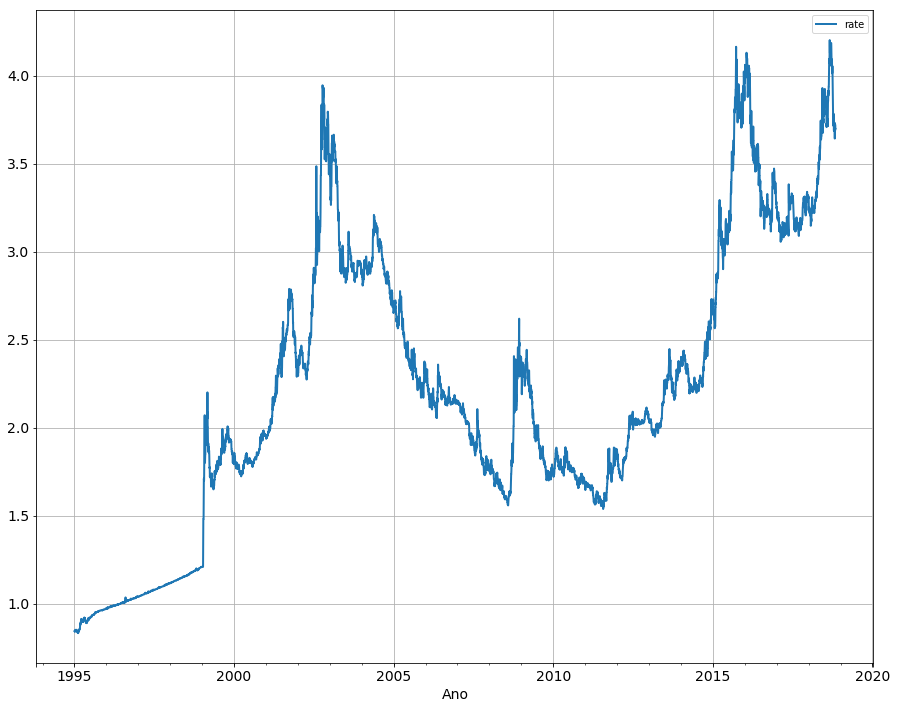

In [26]:
timeseries.plot_timeserie(df_daily)

In [27]:
# removo o periodo inicial da serie temporal
# tem um padrao que nao se repete
# estou trabalhando com dados de 18 anos
df_daily = df_daily['2000-11-03':]

#arima.print_dataframe_info(df_daily)

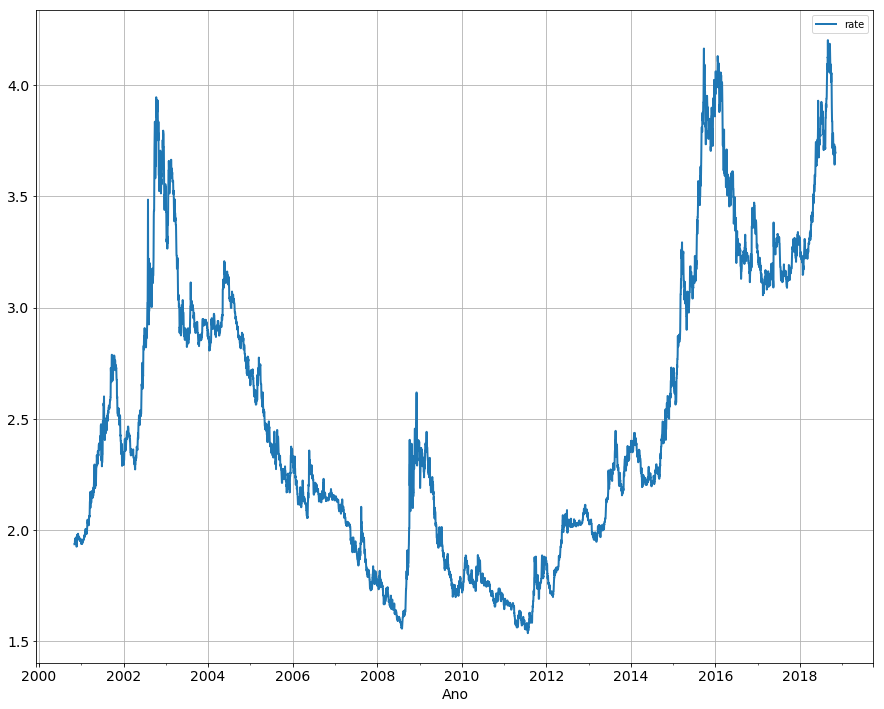

In [28]:
timeseries.plot_timeserie(df_daily)

## Obtendo a serie temporal SEMANAL

In [29]:
# transforma numa serie temporal semanal com o valor da sexta-feira
df_weekly = df_daily.resample('W-FRI')
df_weekly = df_weekly.mean()

#arima.print_dataframe_info(df_weekly)

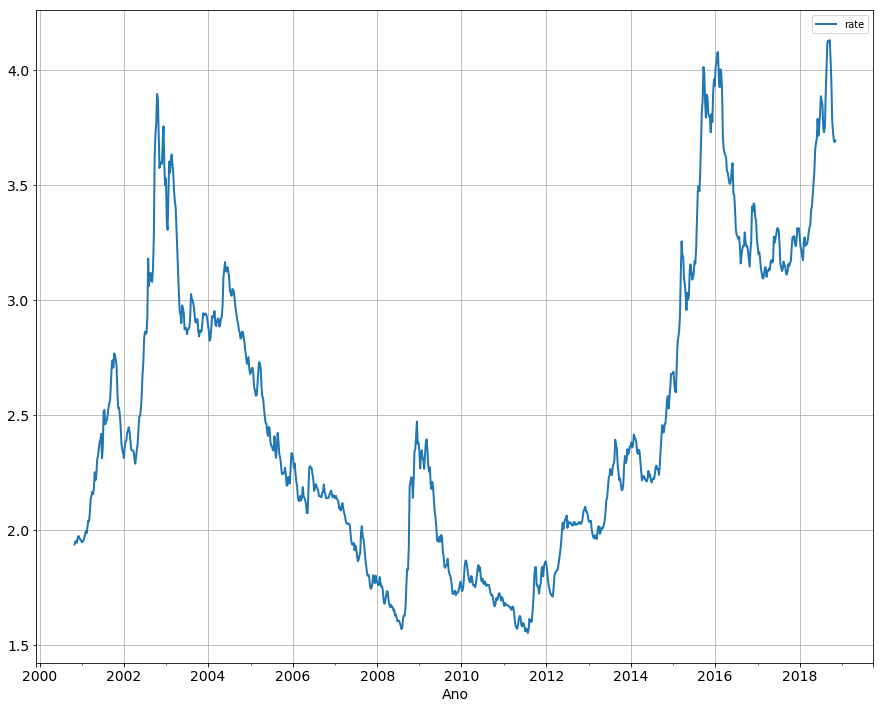

In [30]:
timeseries.plot_timeserie(df_weekly)

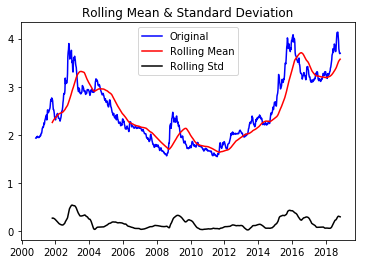

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.419015) > Critical Value 1 (-3.437386)
[FALHA] Test Statistic (-1.419015) > Critical Value 5 (-2.864646)
[FALHA] Test Statistic (-1.419015) > Critical Value 10 (-2.568424)
[FALHA] p-value (0.573127) > 0.05


In [31]:
timeseries.check_stationarity(df_weekly, window=52)

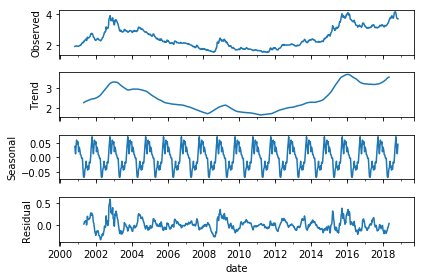

In [32]:
result = seasonal_decompose(df_weekly, model='additive')
result.plot()
plt.show()

## Obtendo a serie temporal MENSAL

In [33]:
df_monthly = df_daily.resample('M')
df_monthly = df_monthly.mean()

#arima.print_dataframe_info(df_monthly)

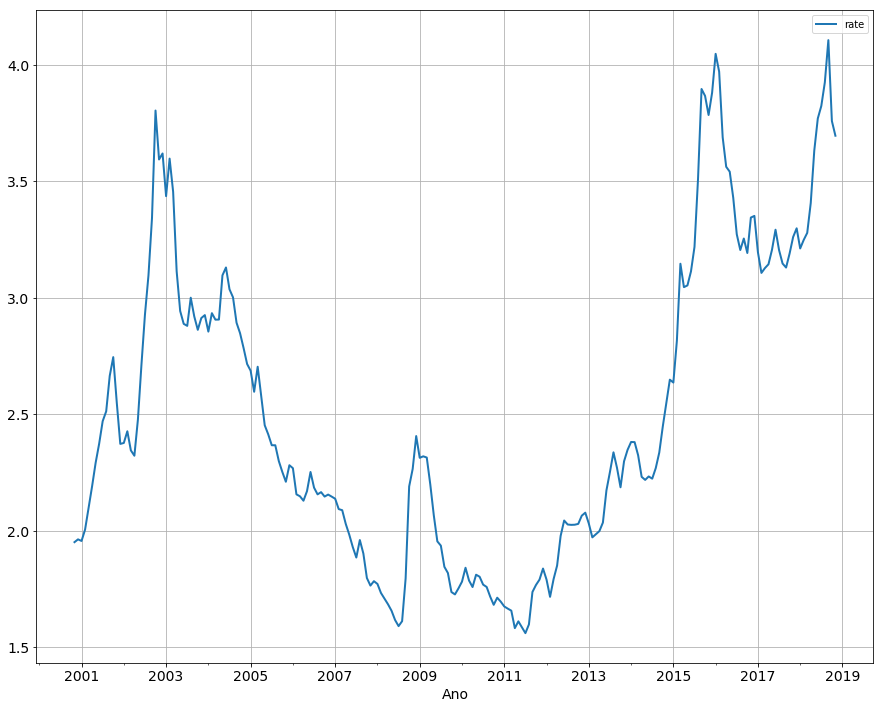

In [34]:
timeseries.plot_timeserie(df_monthly)

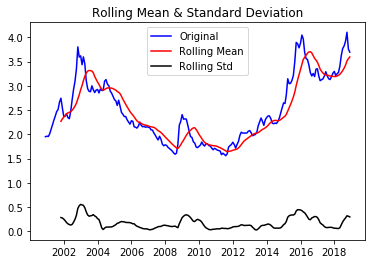

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.376881) > Critical Value 1 (-3.461136)
[FALHA] Test Statistic (-1.376881) > Critical Value 5 (-2.875079)
[FALHA] Test Statistic (-1.376881) > Critical Value 10 (-2.573986)
[FALHA] p-value (0.593308) > 0.05


In [35]:
timeseries.check_stationarity(df_monthly, window=12)

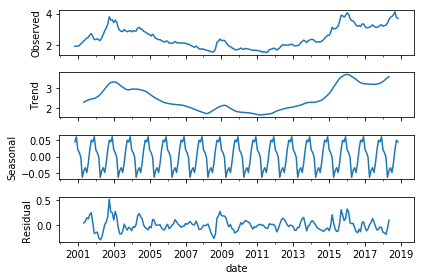

In [36]:
result = seasonal_decompose(df_monthly, model='additive')
result.plot()
plt.show()